# TS Diagram

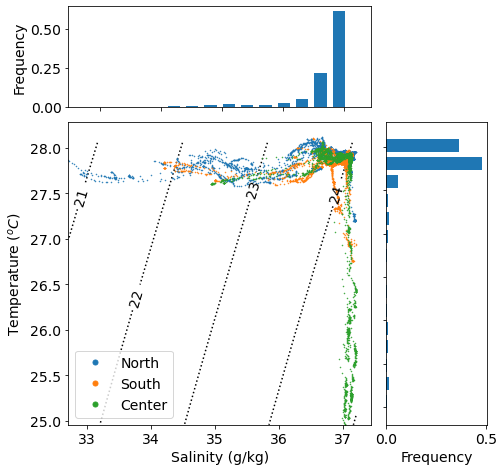



### CTD data recorded on Sergipe's shelf (Canyon Japaratuba)

In [48]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seawater as sea

##### -> The data were preprocessed in another notebook. Here we just upload the processed data.

##### -> The data is stored as a list with 3 datasets... each dataset is an array with several columns

##### -> For our purposes here, temperatura and salinity are the columns 2 and 3, respectively




In [18]:
with open('CTD_Canion_ZedoPeixe.pkl', 'rb') as io:
    data = pickle.load(io)
    
temperature = []
salinity = []

j_temperature = []
j_salinity = []

'''
for the sake of legibility, se separate the variables in other lists, and also merge 
the data for building the histograms later
'''
for i in range(3):
    temperature.append(data[i][:,2]) 
    salinity.append(data[i][:,3])
    
    j_temperature = j_temperature + temperature[i].tolist()
    j_salinity = j_salinity + salinity[i].tolist()

In [24]:
temp_f, temp_c = np.histogram(j_temperature, 15)
sal_f, sal_c = np.histogram(j_salinity, 15)

'''
converting 'occurrences' to 'frequencies'
'''
temp_f = temp_f/np.sum(temp_f)
sal_f = sal_f/np.sum(sal_f)

'''
to get the center of each class, as the 'histogram' returns the class limits
'''
temp_c = (temp_c[:-1] + temp_c[1:])/2
sal_c = (sal_c[:-1] + sal_c[:-1])/2

<a list of 7 text.Text objects>

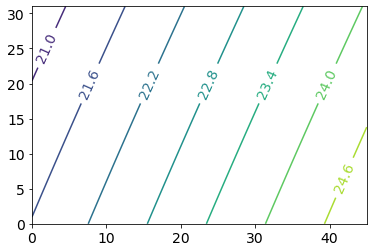

In [85]:
'''
Density contours for the diagram...
'''
temp_r = np.arange(np.min(j_temperature), np.max(j_temperature), .1)
sal_r = np.arange(np.min(j_salinity), np.max(j_salinity), .1)

xx, yy = np.meshgrid(sal_r, temp_r)

rho = sea.dens(xx, yy, 1) - 1000

cs = plt.contour(rho)
plt.clabel(cs, inline=1, fmt='%1.1f')

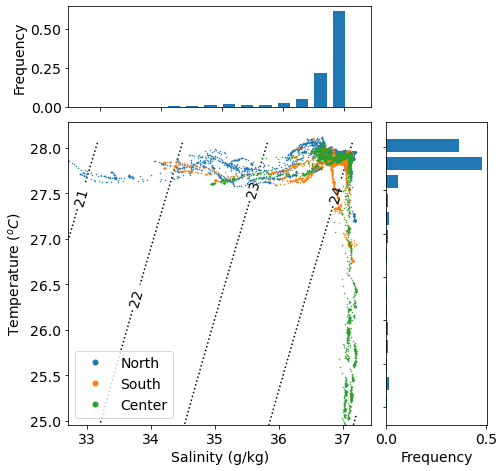

In [92]:
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(7,7))

ax = fig.add_axes([.1, .1, .6, .6])
ax_top = fig.add_axes([.1, .73, .6, .2])
ax_side = fig.add_axes([.73, .1, .2, .6])

labels = ['North', 'South', 'Center']
for i in range(3):
    ax.plot(salinity[i], temperature[i], '.', ms=1, label=labels[i])

xlims = ax.get_xlim()
ylims = ax.get_ylim()

cs = ax.contour(sal_r, temp_r, rho, np.arange(21, 26), linestyles=':', colors='k')
ax.clabel(cs, inline=1, fmt='%1.0f')

lgnd = ax.legend()
for i in range(3):
    lgnd.legendHandles[i]._legmarker.set_markersize(10)

ax_side.barh(temp_c, temp_f, height = .15)
ax_top.bar(sal_c, sal_f, width = .2)

ax_side.set_ylim(ylims)
ax_top.set_xlim(xlims)

ax_side.set_yticklabels('')
ax_top.set_xticklabels('')

ax_side.set_xlabel('Frequency')
ax_top.set_ylabel('Frequency')

ax.set_xlabel('Salinity (g/kg)')
ax.set_ylabel('Temperature ($^o C$)')
plt.show()